In [171]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
train_df = pd.read_csv('data/HeadHunter_train.csv')
test_df = pd.read_csv('data/HeadHunter_test.csv')

In [173]:
train_df.target = train_df.target.str.split(',')
train_df = train_df.explode('target')

In [174]:
general_df = train_df.append(test_df).reset_index(drop=True)

In [175]:
general_df['is_ok'] = (general_df.target == '0').astype(int)

In [176]:
general_df['positive_len'] = general_df.positive.str.len()
general_df['negative_len'] = general_df.negative.str.len()
general_df['position_len'] = general_df.position.str.len()

popular_city = general_df.city.value_counts()[:20].index
general_df['city_cat'] = general_df.city.apply(lambda x: x if x in popular_city else 'Other')

<Figure size 1152x1152 with 0 Axes>

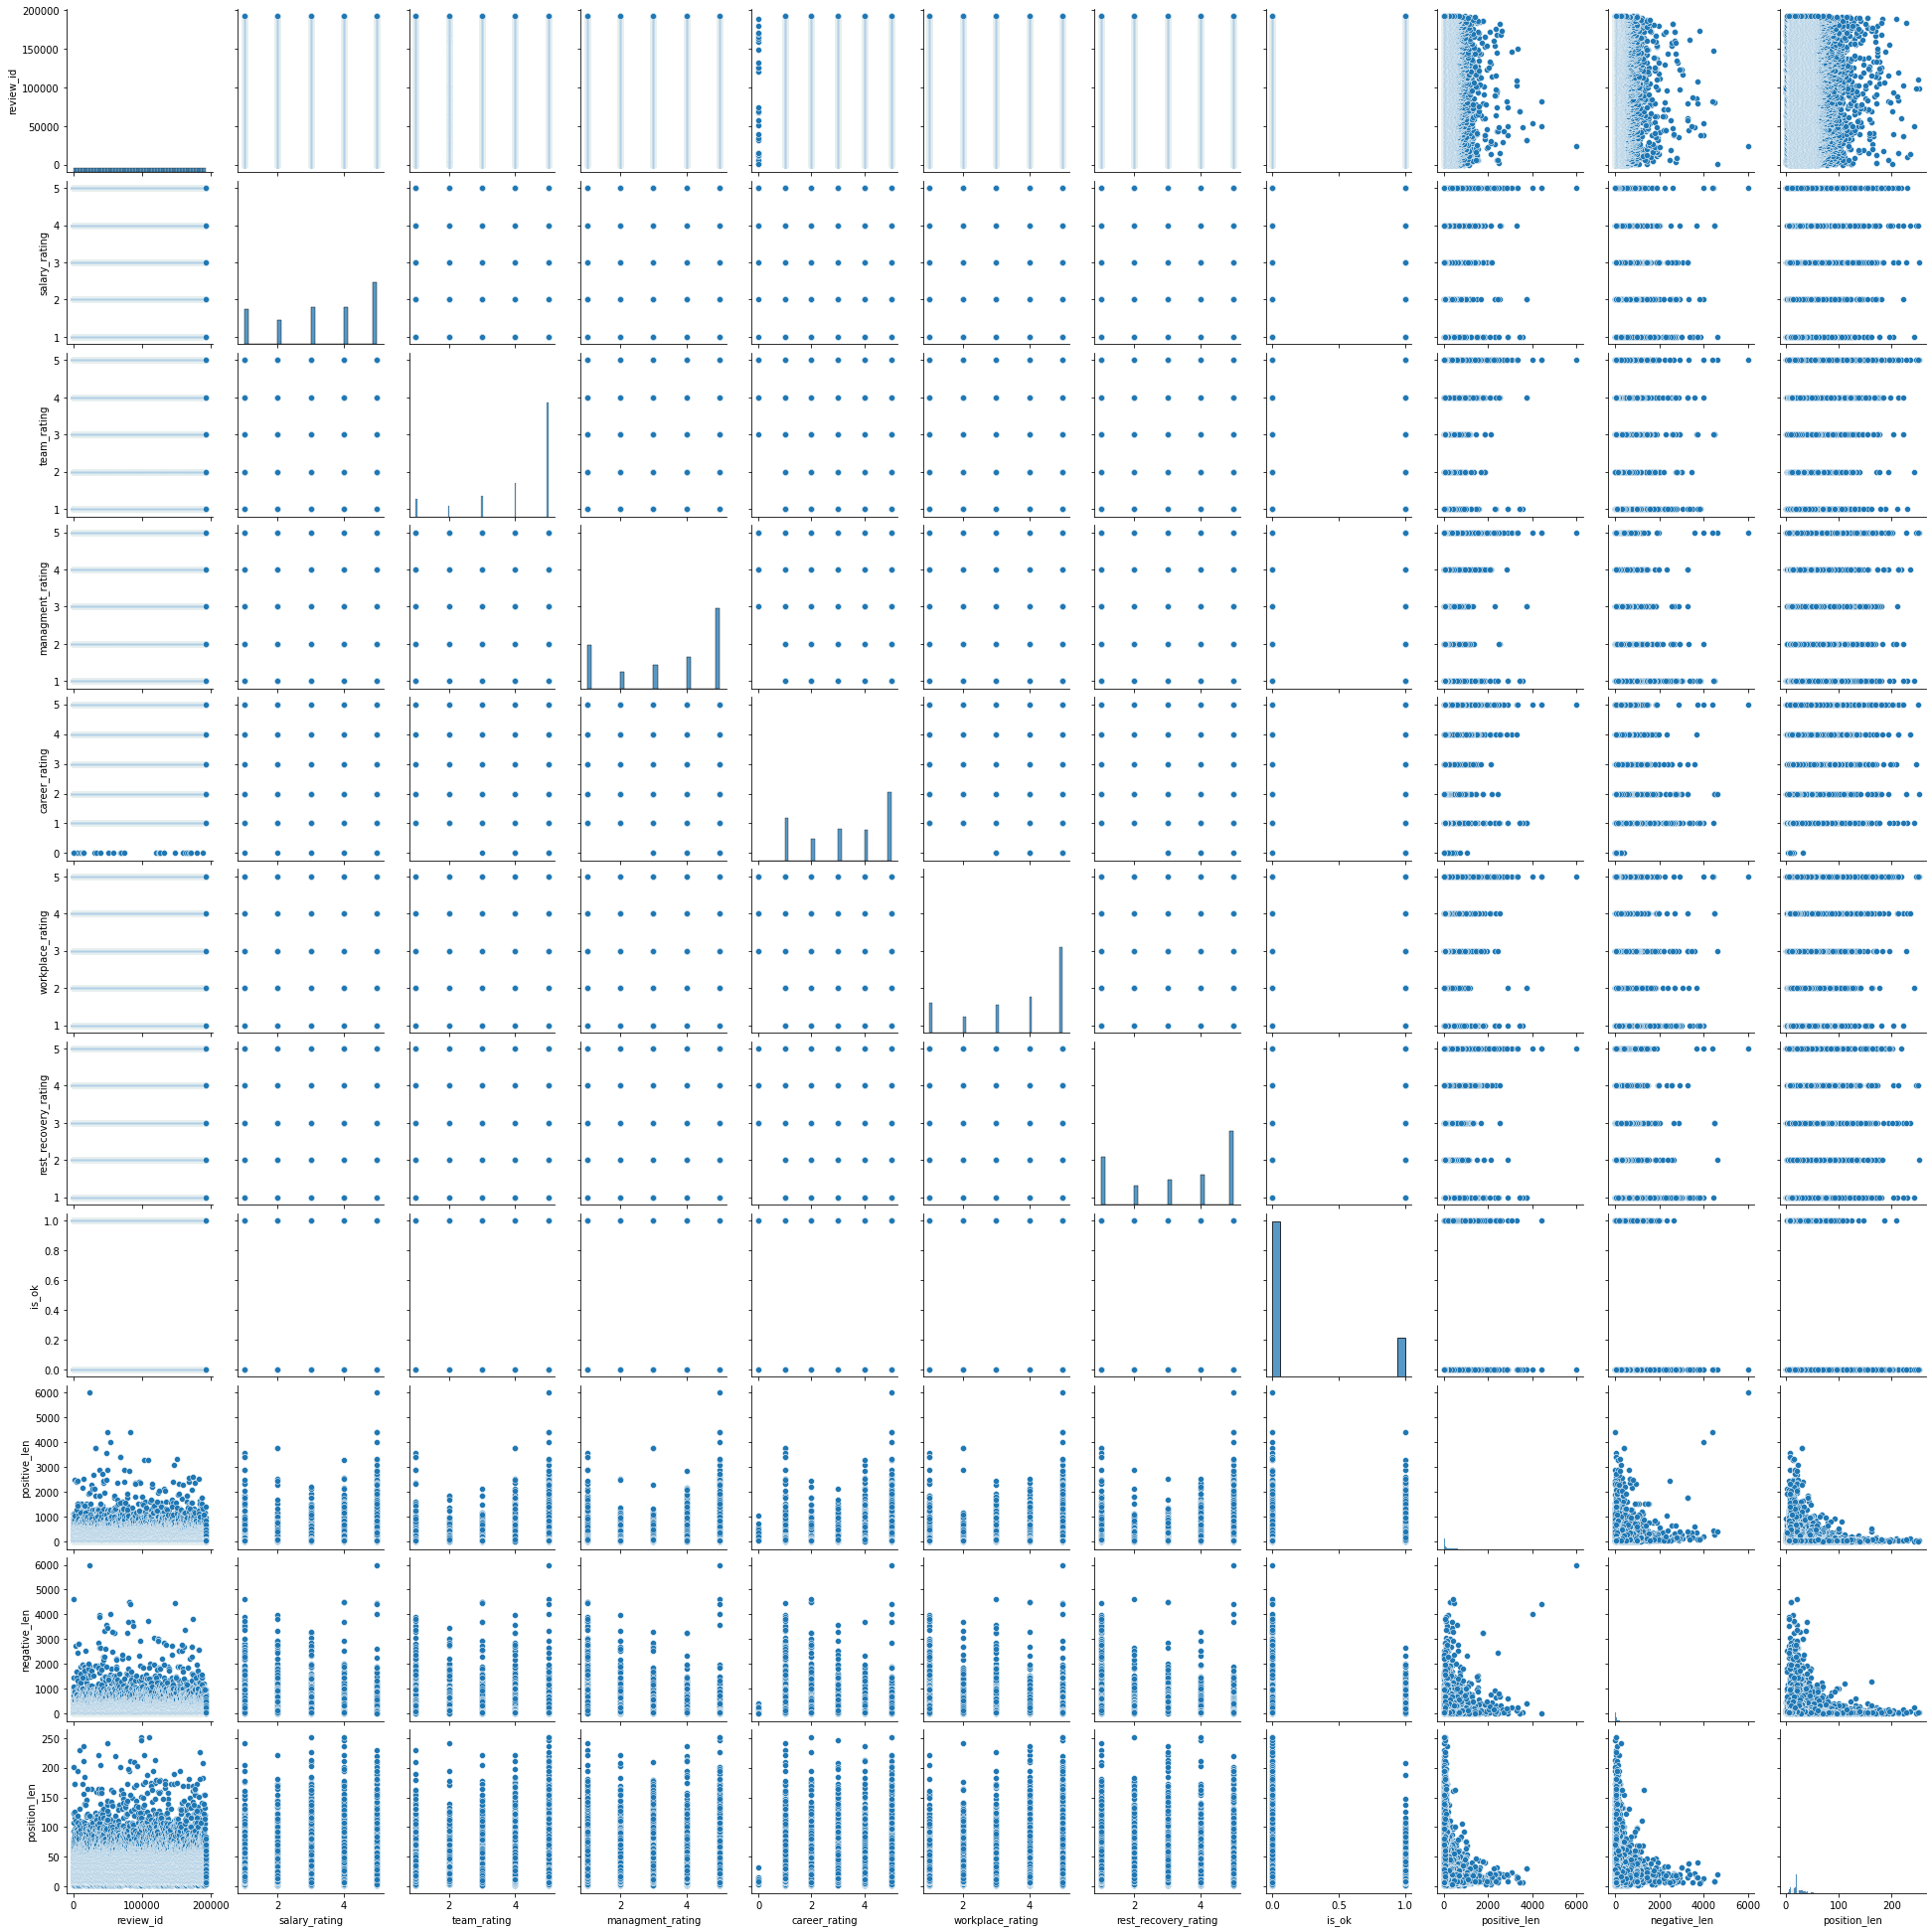

In [177]:
plt.figure(figsize=(16, 16))
sns.pairplot(general_df.drop(['positive', 'negative', 'position', 'city', 'city_cat'], axis=1))
plt.show()

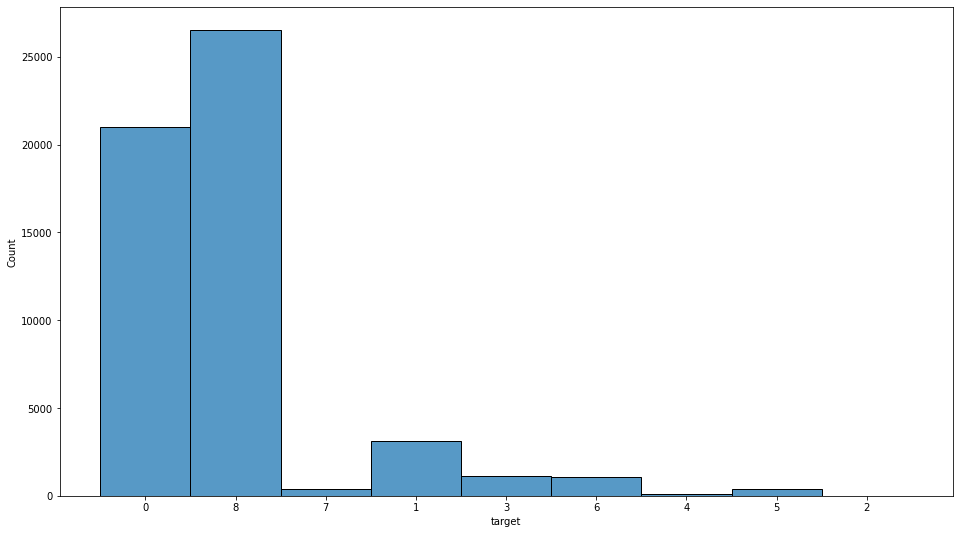

In [178]:
plt.figure(figsize=(16, 9))
sns.histplot(data=general_df, x='target')
plt.show()

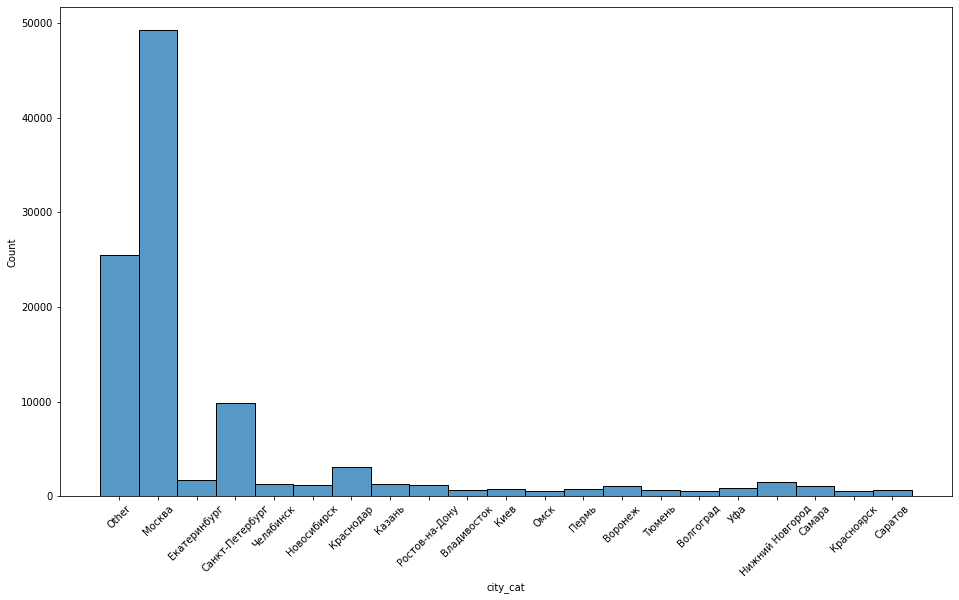

In [179]:
plt.figure(figsize=(16, 9))
sns.histplot(data=general_df, x='city_cat')
plt.xticks(rotation=45)
plt.show()

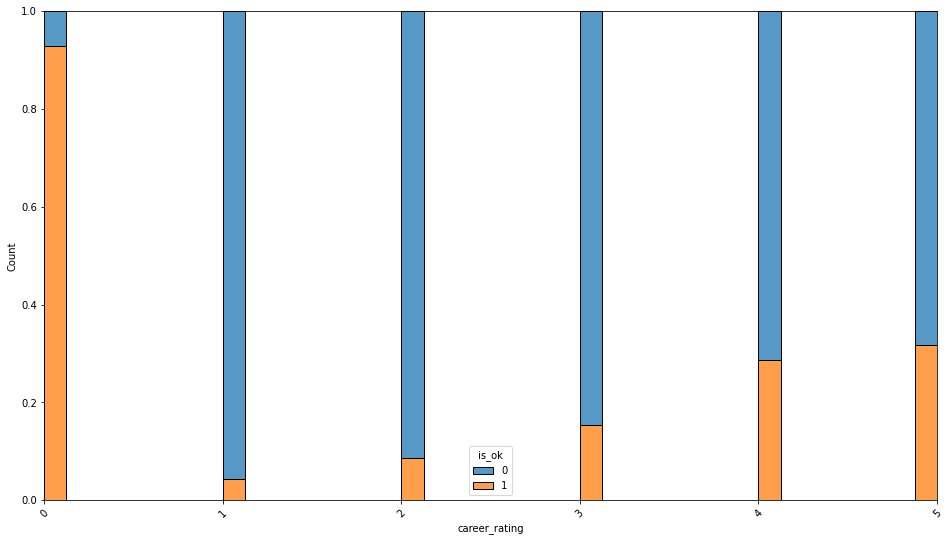

In [180]:
plt.figure(figsize=(16, 9))
sns.histplot(data=general_df, x='career_rating', hue='is_ok', multiple='fill')
plt.xticks(rotation=45)
plt.show()

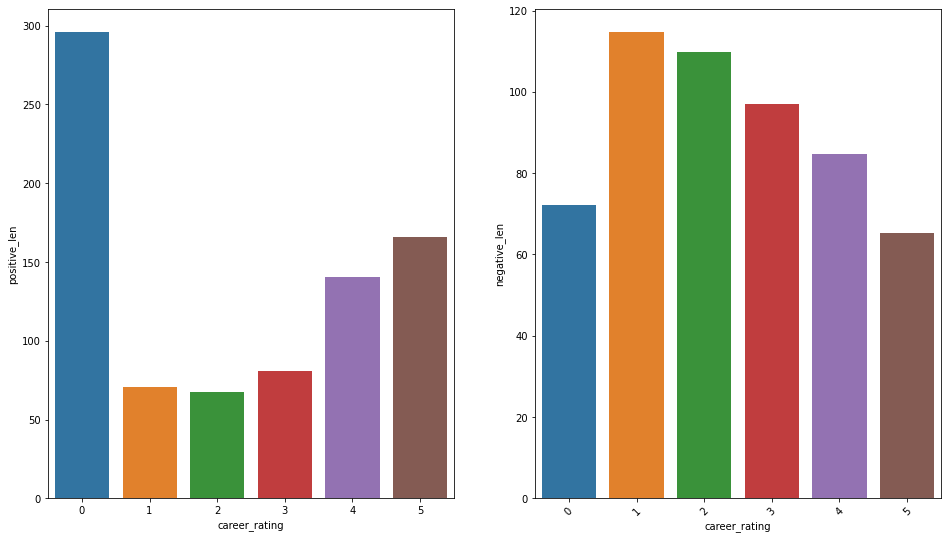

In [181]:
_, axes = plt.subplots(1, 2, figsize=(16, 9))
grouped_by_career_rating = general_df.groupby('career_rating').agg({'positive_len': 'mean', 'negative_len': 'mean'}).reset_index()

sns.barplot(
    data=grouped_by_career_rating, 
    y='positive_len',
    x='career_rating', 
    ax=axes[0]
)
sns.barplot(
    data=grouped_by_career_rating, 
    y='negative_len',
    x='career_rating', 
    ax=axes[1]
)
plt.xticks(rotation=45)
plt.show()

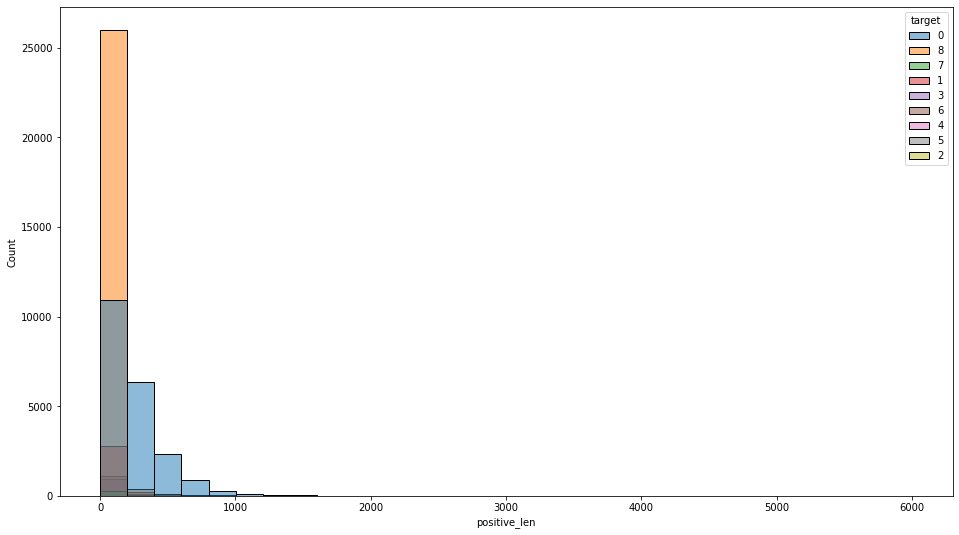

In [182]:
plt.figure(figsize=(16, 9))
sns.histplot(data=general_df, x='positive_len', bins=30, hue='target')
plt.show()

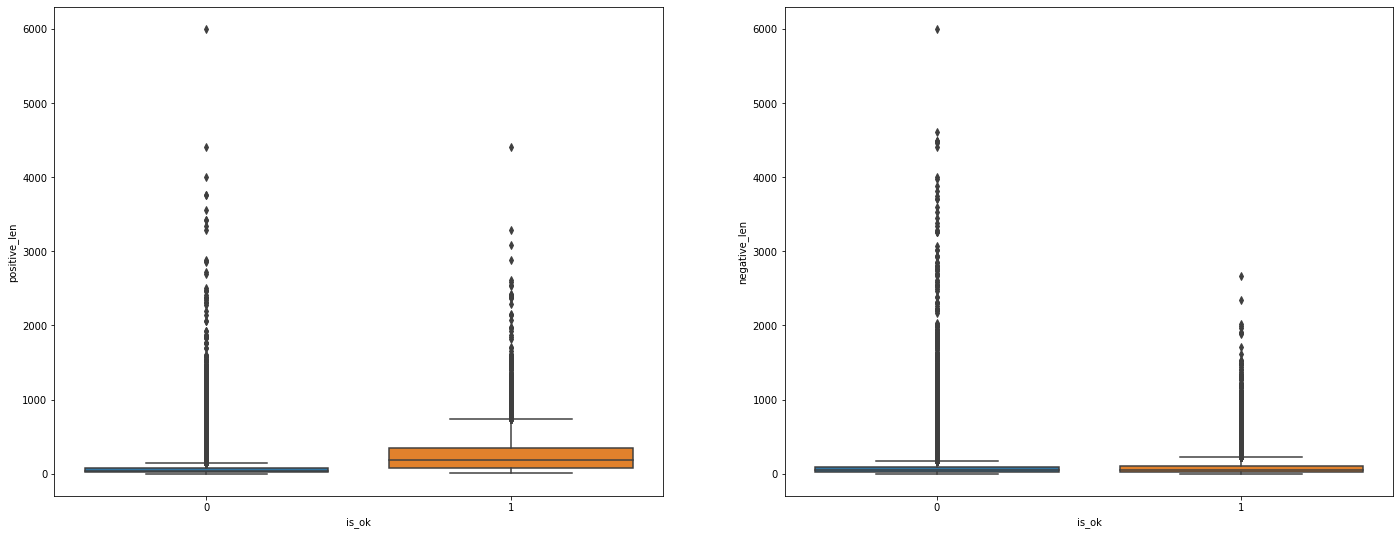

In [183]:
_, axes = plt.subplots(1, 2, figsize=(24, 9))
sns.boxplot(data=general_df, y='positive_len', x='is_ok', ax=axes.flat[0])
sns.boxplot(data=general_df, y='negative_len', x='is_ok', ax=axes.flat[1])
plt.show()

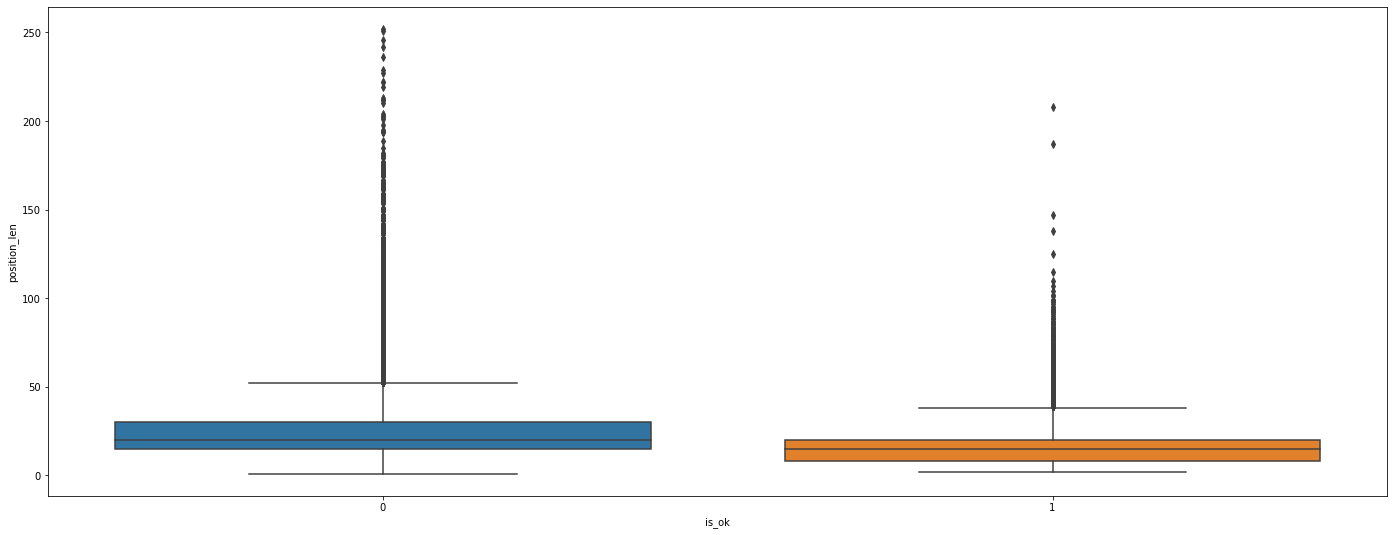

In [184]:
_, axes = plt.subplots(1, 1, figsize=(24, 9))
sns.boxplot(data=general_df, y='position_len', x='is_ok', ax=axes)
plt.show()

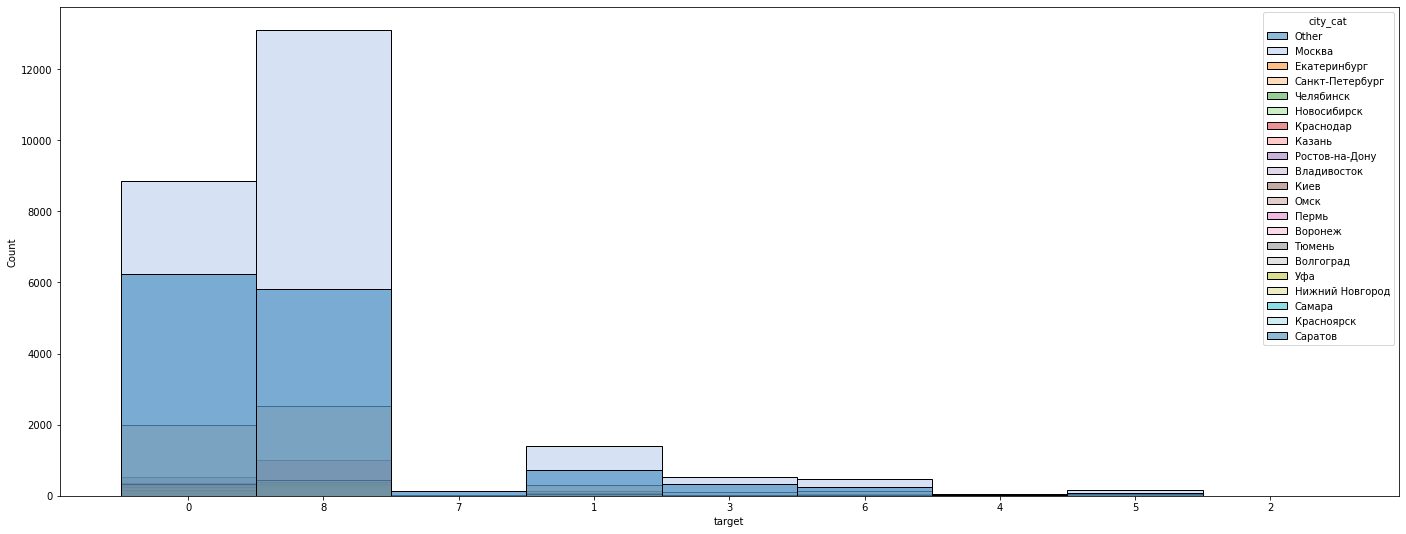

In [185]:
plt.figure(figsize=(24, 9))
sns.histplot(data=general_df, x='target', hue='city_cat', palette='tab20')
plt.show()

In [186]:
general_df['positive_digit_count'] = general_df['positive'].str.count('[0-9]') / general_df['positive'].str.len()

In [187]:
general_df.query("target == '2'").negative.head().tolist()

['Коммуникация с отделом кадров.Непонятная ситуация с трудовой книжной.Уволилась 10.11.2021,до сих пор не получила трудовую книжку ,по ощущениям специальное затягивание и не отправление книжки…Хотя на обучении говорили о том ,что курьер забирает ТК и привозит при увольнении (по факту курьер действительно приехал и забрал ТК,а вот с получением очень большая проблема!!!!!Как мне получить мою ТК,дайте обратную связь,пожалуйста',
 'Иногда хочется лишний выходной... Но это, наверное как и везде, по началу много сил тратишь, пока адаптируешься к рабочему процессу',
 'Коммуникацию между сотрудниками',
 'пока все устраивает, а дальше будет видно, может быть и найдутся какие нибудь недостатки. пока все хорошо. и не видно никаких недостатков. надеюсь и дальше все будет хорошо',
 'Увеличить количество персонала в магазинах, так как очень высокий уровень нагрузки']

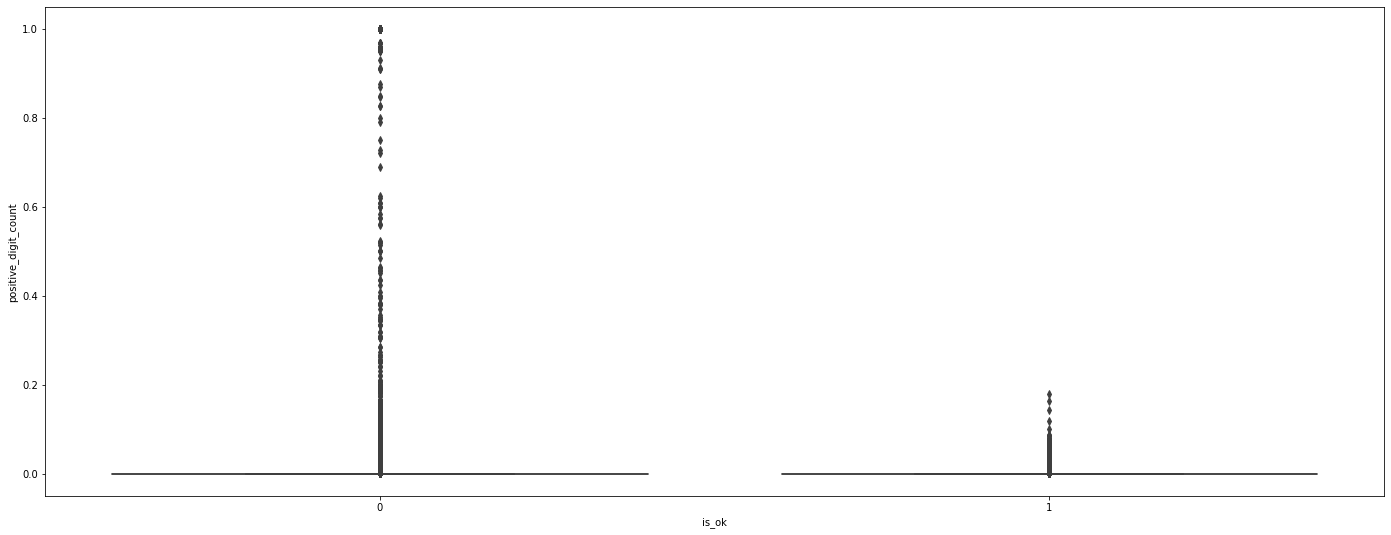

In [188]:
plt.figure(figsize=(24, 9))
sns.boxplot(data=general_df, y='positive_digit_count', x='is_ok')
plt.show()